In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.metrics import r2_score

def load_data() -> dict[str, pd.DataFrame]:
	"""
	Load data from CSV files in the 'csv' directory and return a dictionary of DataFrames.

	Returns:
		dict[str, pd.DataFrame]: A dictionary where the keys are the names of the CSV files
		(extracted from the file names) and the values are the corresponding DataFrames.
	"""
	data = {}
	for file in os.listdir("csv"):
		if file.startswith("predictions"):
			name = file.split("_")[1:]
			name = "_".join(name).split(".")[0]
			data[name] = pd.read_csv("csv/" + file)
	return data

In [79]:
dfs = load_data()

In [88]:
def calculate_metrics(dfs: dict[str, pd.DataFrame]):
    metrics = {}
    for model_name, df in dfs.items():
        predictions = df["predictions"]
        actuals = df["actual"]

        errors = predictions - actuals
        smape = (2 * (errors.abs()) / (actuals.abs() + predictions.abs())).mean() * 100
        mape = (errors.abs() / actuals.abs()).mean() * 100
        r2 = r2_score(actuals, predictions)
        std = errors.std()

        metrics[model_name] = {"SMAPE": smape, "MAPE": mape, "STD": std, "R2": r2}
    
    return metrics

def plot_SMAPE(metrics):
    df_metrics = pd.DataFrame(metrics).T
    fig, ax = plt.subplots(figsize=(12, 8))
    
    bars = ax.bar(df_metrics.index, df_metrics['SMAPE'], yerr=df_metrics['STD'], capsize=5)
    ax.set_ylabel('SMAPE (%)')
    ax.set_title('Model Metrics')
    
    for bar, std in zip(bars, df_metrics['STD']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2*0.95, height*1.01, f'{std:.2f}', ha='right', va='bottom')
    
    plt.show()

def plot_MAPE(metrics):
    df_metrics = pd.DataFrame(metrics).T
    fig, ax = plt.subplots(figsize=(12, 8))
    
    bars = ax.bar(df_metrics.index, df_metrics['MAPE'], yerr=df_metrics['STD'], capsize=5)
    ax.set_ylabel('MAPE (%)')
    ax.set_title('Model Metrics')
    
    for bar, std in zip(bars, df_metrics['STD']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2*0.95, height*1.01, f'{std:.2f}', ha='right', va='bottom')
    
    plt.show()
    
def plot_errors(dfs: dict[str, pd.DataFrame]):
    plt.figure(figsize=(10, 6))
    for model_name, df in dfs.items():
        errors = (df["predictions"] - df["actual"]).abs()
        sns.histplot(errors, kde=True, label=model_name, bins=15, log_scale=True)

    plt.title("Prediction Errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

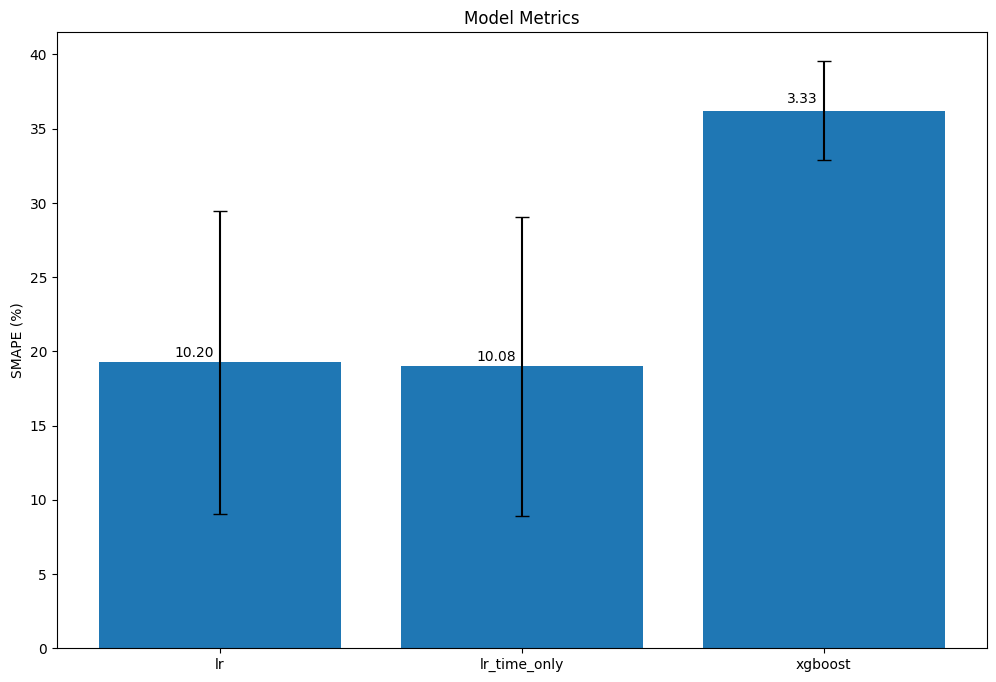

In [89]:
metrics = calculate_metrics(dfs)
plot_SMAPE(metrics)

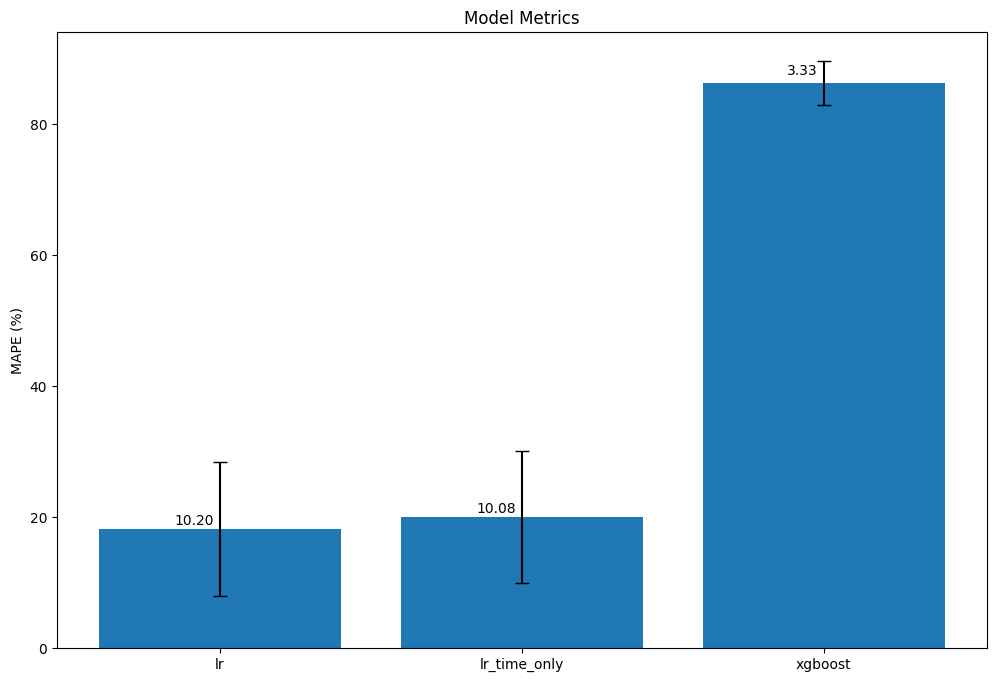

In [90]:
plot_MAPE(metrics)

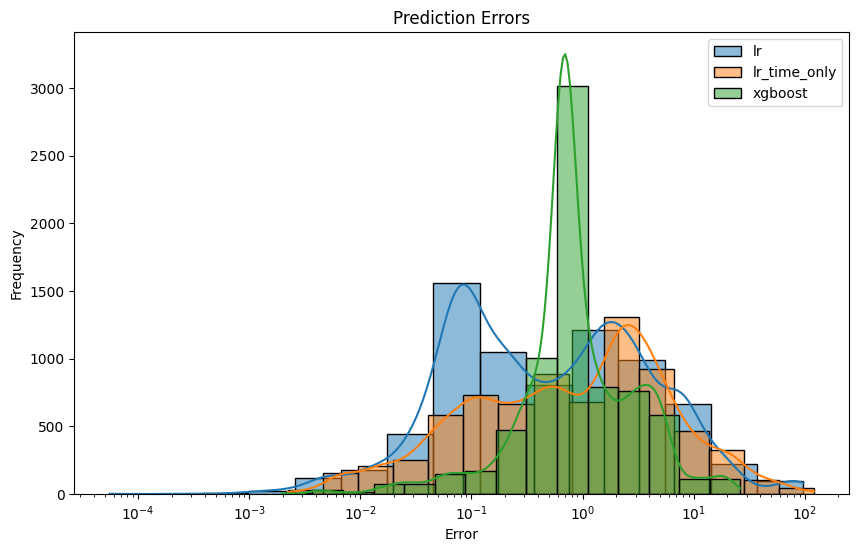

In [91]:
plot_errors(dfs)